Construir e interpretar el grafico matricial para las 4 vars consideradas las cuales son:
 1.- Rendimiento diario de SNY
 2.- Rendimiento diario de GME 
 3.- Media movil de 50/200 dias de SNY
 4.- Media movil de 50/200 dias de GME 

In [2]:
# Librerias que vamos a utilizar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
SNE=pd.read_csv("SNE_Historical_Data.csv",index_col=None)
GME=pd.read_csv("GME_Historical_Data.csv",index_col=None)
SNE_E=pd.read_csv("SNE_Historical_Data_extendido.csv",index_col=None)
GME_E=pd.read_csv("GME_Historical_Data_extendido.csv",index_col=None)


#Comprobando que se ha cargado todo bien
print(SNE.head())
print(" ")
print(GME.head())
print(" ")
print(SNE_E.head())
print(" ")
print(GME_E.head())


           Date   Price    Open    High     Low   Vol. Change %
0  Feb 05, 2021  116.71  118.25  118.25  115.26  2.03M    5.26%
1  Feb 04, 2021  110.88  111.05  111.05  109.03  1.38M   -0.39%
2  Feb 03, 2021  111.31  108.20  112.29  107.34  3.03M   12.16%
3  Feb 02, 2021   99.24   99.35   99.82   99.17  1.27M    0.72%
4  Feb 01, 2021   98.53   97.41   98.59   96.96  1.50M    2.95%
 
           Date   Price    Open    High     Low    Vol. Change %
0  Feb 05, 2021   63.77   54.20   93.52   51.15  81.35M   19.20%
1  Feb 04, 2021   53.50   90.81   90.81   53.40  62.43M  -42.11%
2  Feb 03, 2021   92.41  111.90  112.93   85.50  42.70M    2.68%
3  Feb 02, 2021   90.00  140.76  158.00   74.22  76.75M  -60.00%
4  Feb 01, 2021  225.00  315.00  320.00  213.07  37.38M  -30.77%
 
           Date   Price    Open    High     Low     Vol. Change %
0  Feb 12, 2021  113.53  112.81  113.62  112.79  557.69K   -0.39%
1  Feb 11, 2021  113.97  114.02  114.74  113.44  468.21K    0.58%
2  Feb 10, 2021  113.31 

## Rendimiento Diario

In [4]:
# Primero sacamos lo que es relevante para nosotros
RND_SNE=([],[])
RND_GME=([],[])
for i in range(len(SNE)):
    RND_SNE[0].append((SNE["Date"][len(SNE)-1-i]))  
    RND_SNE[1].append(float(SNE["Change %"][len(SNE)-1-i][:-1]))
                   
for i in range(len(SNE)):
    RND_GME[0].append((GME["Date"][len(SNE)-1-i])) 
    RND_GME[1].append(float(GME["Change %"][len(SNE)-1-i][:-1]))
    
    

BOXPLOTS BABY

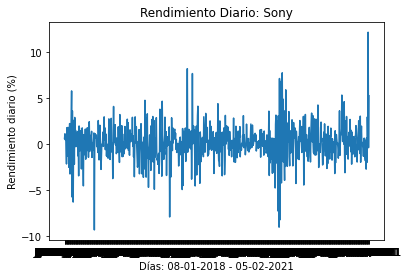

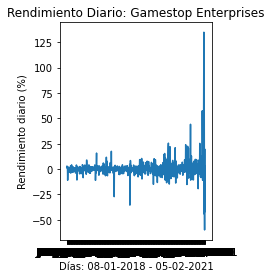

In [5]:
plt.subplots(1,2)

plt.subplot(111)
plt.plot(RND_SNE[0],RND_SNE[1],scalex=True)
plt.ylabel("Rendimiento diario (%)")
plt.xlabel("Días: 08-01-2018 - 05-02-2021")
plt.title("Rendimiento Diario: Sony")

plt.show()

plt.subplot(121)
plt.plot(RND_GME[0],RND_GME[1])
plt.ylabel("Rendimiento diario (%)")
plt.xlabel("Días: 08-01-2018 - 05-02-2021")
plt.title("Rendimiento Diario: Gamestop Enterprises")
plt.show()

## Media Movil 50 Días

Teniendo en cuenta la fórmula de la media móvil para n periodos en el instante t:

MAn(t) = (p(t)+p(t-1)+...+p(t-(n-1)) / n

por suerte, existe una función (pandas.DataFrame.rolling()) que nos calcula la medía móvil según los parametros que insertes.

In [6]:
aux_price=[]
aux_dates=[]
aux_panda=pd.DataFrame()
RND_SNE=([],[])
RND_GME=([],[])
for i in range(len(SNE_E)):
    aux_dates.append(SNE_E["Date"][i])
    aux_price.append(SNE_E["Price"][i])
    
aux_price.reverse()
aux_dates.reverse()
aux_panda["Date"]=aux_dates
aux_panda["Price"]=aux_price
aux_panda["MA"]=aux_panda["Price"].rolling(window=50).mean()

for i in range(len(SNE)):
    RND_SNE[0].append((SNE["Date"][len(SNE)-1-i]))  
    RND_SNE[1].append(aux_panda["MA"][246+i]) 
    
aux_price=[]
aux_dates=[]
aux_panda=pd.DataFrame()    
for i in range(len(GME_E)):
    aux_price.append(GME_E["Price"][i])
    aux_dates.append(GME_E["Date"][i])
    
aux_price.reverse()
aux_dates.reverse()
aux_panda["Date"]=aux_dates
aux_panda["Price"]=aux_price
aux_panda["MA"]=aux_panda["Price"].rolling(window=50).mean()
    
                   
for i in range(len(SNE)):
    RND_GME[0].append((GME["Date"][len(SNE)-1-i]))  
    RND_GME[1].append(aux_panda["MA"][246+i]) 

In [7]:
aux_panda["Date"][246]

'Jan 08, 2018'

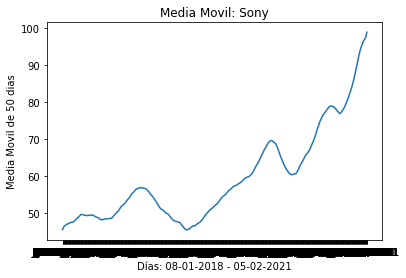

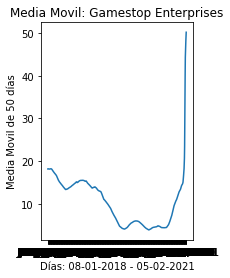

In [8]:
plt.subplots(1,2)

plt.subplot(111)
plt.plot(RND_SNE[0],RND_SNE[1],scalex=True)
plt.ylabel("Media Movil de 50 dias")
plt.xlabel("Días: 08-01-2018 - 05-02-2021")
plt.title("Media Movil: Sony")
plt.show()

plt.subplot(121)
plt.plot(RND_GME[0],RND_GME[1])
plt.ylabel("Media Movil de 50 días")
plt.xlabel("Días: 08-01-2018 - 05-02-2021")
plt.title("Media Movil: Gamestop Enterprises")
plt.show()

## Media Movil 200 Días
Aplicando el caso para los 200 últimos días:

In [9]:
aux_price=[]
aux_panda=pd.DataFrame()
RND_SNE=([],[])
RND_GME=([],[])
for i in range(len(SNE_E)):
    aux_price.append(SNE_E["Price"][i])
    
aux_price.reverse()
aux_panda["Price"]=aux_price
aux_panda["MA"]=aux_panda["Price"].rolling(window=200).mean()

for i in range(len(SNE)):
    RND_SNE[0].append((SNE["Date"][len(SNE)-1-i]))  
    RND_SNE[1].append(aux_panda["MA"][246+i]) 
    
aux_price=[]
aux_panda=pd.DataFrame()    
for i in range(len(GME_E)):
    aux_price.append(GME_E["Price"][i])
    
aux_price.reverse()
aux_panda["Price"]=aux_price
aux_panda["MA"]=aux_panda["Price"].rolling(window=200).mean()
    
                   
for i in range(len(SNE)):
    RND_GME[0].append((GME["Date"][len(SNE)-1-i]))  
    RND_GME[1].append(aux_panda["MA"][246+i]) 

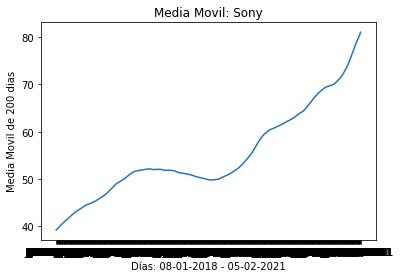

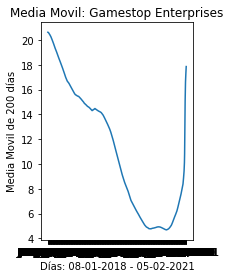

In [10]:
plt.subplots(1,2)

plt.subplot(111)
plt.plot(RND_SNE[0],RND_SNE[1],scalex=True)
plt.ylabel("Media Movil de 200 dias")
plt.xlabel("Días: 08-01-2018 - 05-02-2021")
plt.title("Media Movil: Sony")
plt.show()

plt.subplot(121)
plt.plot(RND_GME[0],RND_GME[1])
plt.ylabel("Media Movil de 200 días")
plt.xlabel("Días: 08-01-2018 - 05-02-2021")
plt.title("Media Movil: Gamestop Enterprises")
plt.show()

BOXPLOTS 

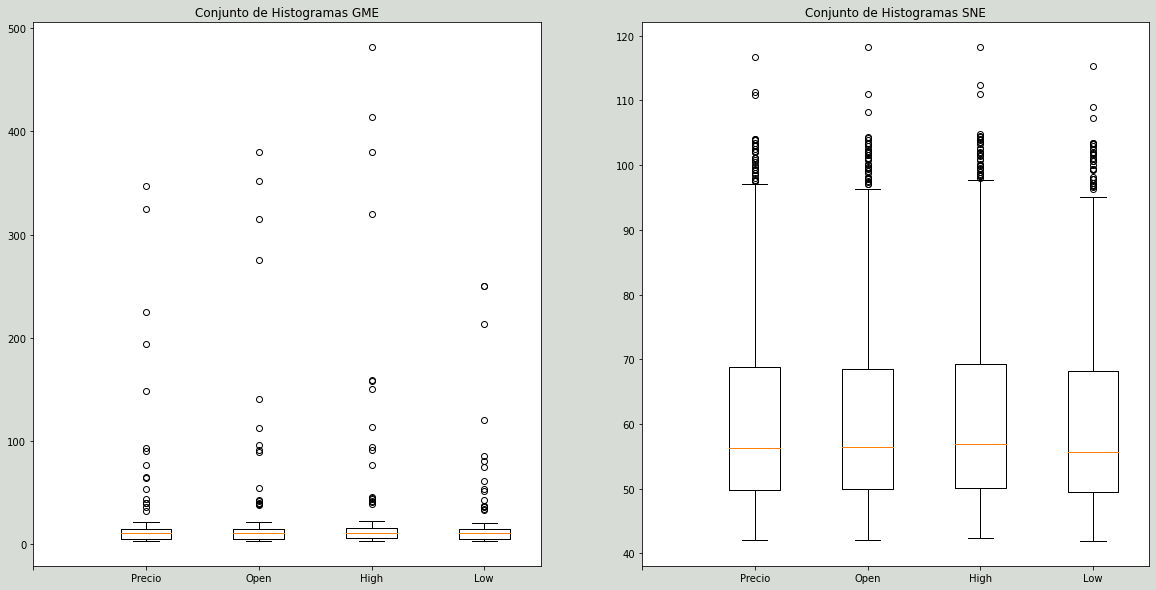

In [76]:


fig = plt.figure(figsize = (20,10))

fig.patch.set_facecolor('xkcd:light grey')

ax1 = fig.add_subplot(121)
plt.boxplot([GME['Price'],GME['Open'], GME['High'], GME['Low']])
plt.xticks(np.arange(5), ['','Precio','Open','High','Low'])
ax2 = fig.add_subplot(122)
plt.boxplot([SNE['Price'],SNE['Open'], SNE['High'], SNE['Low']])
plt.xticks(np.arange(5), ['','Precio','Open','High','Low'])
ax1.title.set_text('Conjunto de Histogramas GME')
ax2.title.set_text('Conjunto de Histogramas SNE')



